#### Problem a

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data/imports-85-01.csv')

In [3]:
df

,make,fuel-type,length,width,height,horsepower,city-mpg,highway-mpg,price
0,alfa-romero,gas,168.8,64.1,48.8,111,21,27,13495
1,alfa-romero,gas,168.8,64.1,48.8,111,21,27,16500
2,alfa-romero,gas,171.2,65.5,52.4,154,19,26,?
3,audi,gas,176.6,66.2,54.3,102,24,30,?
4,audi,gas,176.6,66.4,54.3,115,18,22,17450
...,...,...,...,...,...,...,...,...,...
200,volvo,gas,188.8,68.9,55.5,114,23,28,16845
201,volvo,gas,188.8,68.8,55.5,160,19,25,19045
202,volvo,gas,188.8,68.9,55.5,134,18,23,21485
203,volvo,diesel,188.8,68.9,55.5,106,26,27,22470


In [4]:
dfnum = df.drop(['make','fuel-type'],axis=1)
dfnum

,length,width,height,horsepower,city-mpg,highway-mpg,price
0,168.8,64.1,48.8,111,21,27,13495
1,168.8,64.1,48.8,111,21,27,16500
2,171.2,65.5,52.4,154,19,26,?
3,176.6,66.2,54.3,102,24,30,?
4,176.6,66.4,54.3,115,18,22,17450
...,...,...,...,...,...,...,...
200,188.8,68.9,55.5,114,23,28,16845
201,188.8,68.8,55.5,160,19,25,19045
202,188.8,68.9,55.5,134,18,23,21485
203,188.8,68.9,55.5,106,26,27,22470


Regression analysis in the selected table will produce an error only if only columns with numbers are selected. This is because the price column contains the value '?'So it is not possible to do a regression analysis. Therefore, to solve the error, we will try to solve the error by changing the '?' values to the average value.

In [5]:
missing_values = ["?"]
dfnum = pd.read_csv('data/imports-85-01.csv', na_values = missing_values)

In [6]:
dfnum2 = dfnum.fillna(dfnum['price'].mean())

In [7]:
dfnum3 = dfnum2.drop(['make','fuel-type'],axis=1)

In [8]:
dfnum3_cols = dfnum3.columns[:6]

In [9]:
X = dfnum3[dfnum3_cols]
y = dfnum3.price

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
print(X_train)
print(y_train)

     length  width  height  horsepower  city-mpg  highway-mpg
14    189.0   66.9    55.7       121.0        20           25
162   166.3   64.4    52.8        70.0        28           34
59    177.8   66.5    53.7        84.0        26           32
19    155.9   63.6    52.0        70.0        38           43
177   175.6   66.5    53.9        92.0        27           32
..      ...    ...     ...         ...       ...          ...
133   186.6   66.5    56.1       110.0        21           28
137   186.6   66.5    56.1       160.0        19           26
72    180.3   70.5    50.8       155.0        16           18
140   157.3   63.8    55.7        73.0        26           31
37    167.5   65.2    53.3        86.0        27           33

[153 rows x 6 columns]
14     24565.0
162     9258.0
59      8845.0
19      6295.0
177    11248.0
        ...   
133    12170.0
137    18620.0
72     35056.0
140     7603.0
37      7895.0
Name: price, Length: 153, dtype: float64


In [12]:
print(X_test)
print(y_test)

     length  width  height    horsepower  city-mpg  highway-mpg
78    157.3   64.4    50.8     68.000000        31           38
97    170.2   63.8    53.5     69.000000        31           37
151   158.7   63.6    54.5     62.000000        31           38
44    155.9   63.6    52.0     70.000000        38           43
40    175.4   62.5    54.1     86.000000        27           33
67    190.9   70.3    56.5    123.000000        22           25
98    162.4   63.8    53.3     69.000000        31           37
18    141.1   60.3    53.2     48.000000        47           53
152   158.7   63.6    54.5     62.000000        31           38
62    177.8   66.5    55.5     84.000000        26           32
4     176.6   66.4    54.3    115.000000        18           22
172   176.2   65.6    53.0    116.000000        24           30
197   188.8   67.2    57.5    114.000000        24           28
38    167.5   65.2    53.3     86.000000        27           33
29    173.2   66.3    50.2    145.000000

In [13]:
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [14]:
preds = treereg.predict(X_test)

print(preds)
print(y_test)

[ 6189.          7349.          6795.          9740.92462312
  7053.         28248.          6759.          6479.
  6795.          9870.         13642.5         9879.
 15985.          7895.         13420.66666667  9879.
 11595.          9740.92462312 18620.          9418.
 10698.          9740.92462312 16430.          7823.
  9879.          9740.92462312 13420.66666667  9495.
  6843.33333333  6938.          8238.          8921.
 30760.         13499.         15050.          9495.
  7823.         35550.         34528.         16845.
  6377.         16503.          6479.          9960.
  8235.          6759.         45400.          6795.
 15750.         13499.         21037.5        16630.        ]
78      6669.000000
97      7999.000000
151     6338.000000
44     13186.849246
40     10295.000000
67     25552.000000
98      8249.000000
18      5151.000000
152     6488.000000
62     10245.000000
4      17450.000000
172    17669.000000
197    16515.000000
38      9095.000000
29     12964.0

In [15]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, preds)) 

3923.287502357196

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
treereg = DecisionTreeRegressor(max_depth=2, random_state=1)
scores = cross_val_score(treereg, X, y, cv=3, scoring='neg_mean_squared_error') #RMSE #cv(cross validatopm):3
np.mean(np.sqrt(-scores))

5914.543349818004

In [18]:
treereg = DecisionTreeRegressor(max_depth=3, random_state=1) # parameter depth를 3에서 2로 바꿈
scores = cross_val_score(treereg, X, y, cv=3, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

5393.392130026618

In [19]:
treereg = DecisionTreeRegressor(max_depth=4, random_state=1) # parameter depth를 4로 바꿈
scores = cross_val_score(treereg, X, y, cv=3, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

5779.830940970246

In [20]:
treereg = DecisionTreeRegressor(max_depth=3, random_state=1) # treelag : model that you get
treereg.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=1)

In [21]:
pd.DataFrame({'feature':dfnum3_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,length,0.040781
1,width,0.090981
2,height,0.000000
3,horsepower,0.312520
4,city-mpg,0.000000
5,highway-mpg,0.555718


When I do 3 different experiments on different depth of tree, when max_depth=3 is best. So I compute column importance of each column, 'horsepower' is highest importance 

#### Problem 2

In [22]:
dfnum3['category'] = np.where(dfnum3['price']<=dfnum3['price'].mean(),
'low', 'high')

In [23]:
dfnum3

,length,width,height,horsepower,city-mpg,highway-mpg,price,category
0,168.8,64.1,48.8,111.0,21,27,13495.000000,high
1,168.8,64.1,48.8,111.0,21,27,16500.000000,high
2,171.2,65.5,52.4,154.0,19,26,13186.849246,low
3,176.6,66.2,54.3,102.0,24,30,13186.849246,low
4,176.6,66.4,54.3,115.0,18,22,17450.000000,high
...,...,...,...,...,...,...,...,...
200,188.8,68.9,55.5,114.0,23,28,16845.000000,high
201,188.8,68.8,55.5,160.0,19,25,19045.000000,high
202,188.8,68.9,55.5,134.0,18,23,21485.000000,high
203,188.8,68.9,55.5,106.0,26,27,22470.000000,high


In [24]:
dfnum3['category'] = dfnum3.category.map({'high':1, 'low':0})

In [25]:
dfnum3

,length,width,height,horsepower,city-mpg,highway-mpg,price,category
0,168.8,64.1,48.8,111.0,21,27,13495.000000,1
1,168.8,64.1,48.8,111.0,21,27,16500.000000,1
2,171.2,65.5,52.4,154.0,19,26,13186.849246,0
3,176.6,66.2,54.3,102.0,24,30,13186.849246,0
4,176.6,66.4,54.3,115.0,18,22,17450.000000,1
...,...,...,...,...,...,...,...,...
200,188.8,68.9,55.5,114.0,23,28,16845.000000,1
201,188.8,68.8,55.5,160.0,19,25,19045.000000,1
202,188.8,68.9,55.5,134.0,18,23,21485.000000,1
203,188.8,68.9,55.5,106.0,26,27,22470.000000,1


#### Problem c

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans #library for K-Means Clustering
from sklearn import datasets
from sklearn.datasets import make_blobs

In [27]:
dfnum4 = dfnum3[['price','category']]

In [28]:
d = dfnum4.values
np.random.seed(0)

In [29]:
est = KMeans(n_clusters=2, init='random') 
est.fit(d) 
y_kmeans = est.predict(d)

In [30]:
est.fit_predict(d)
inertia = est.inertia_
inertia

4001159334.344484

Text(0, 0.5, 'price')

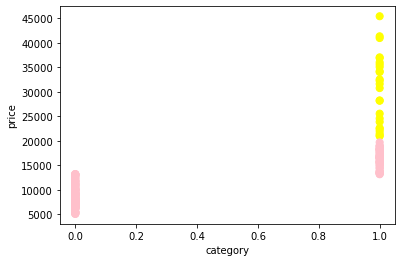

In [31]:
colors = np.array(['yellow','pink']) 
plt.figure()
plt.scatter(d[:,1], d[:,0], c=colors[y_kmeans], s=50) 
plt.xlabel('category') 
plt.ylabel('price')

In [32]:
centers = est.cluster_centers_
centers

array([[3.05851200e+04, 1.00000000e+00],
       [1.07704228e+04, 2.66666667e-01]])

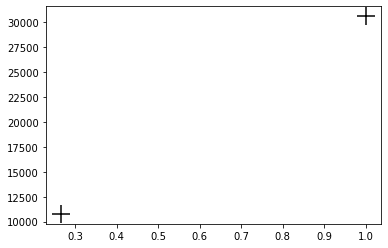

In [33]:
plt.scatter(centers[:, 1], centers[:, 0], c='k', marker='+', s=300)

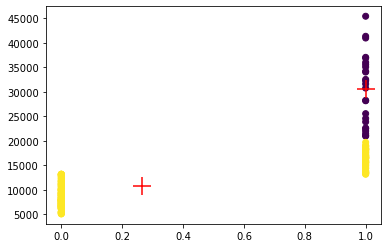

In [34]:
plt.scatter(d[:,1],d[:,0], c=est.labels_);
plt.scatter(est.cluster_centers_[:,1], est.cluster_centers_[:,0], c='red', marker='+', s=300)

In [35]:
#Elbow Method
seed = 0 # put random number
elbow = dict() # create a dictionary (key, value)
for k in range(1,11): # k =1, 2, 3, 4, ... 11
    estimator = KMeans(n_clusters = k,random_state=seed)
    res = estimator.fit_predict(d)
    inertia = estimator.inertia_ # inertia : error
    elbow[k] = inertia #put inertia into variable elbow


In [36]:
elbow

{1: 12619696036.482256,
 2: 4001159334.344484,
 3: 1397429673.8948908,
 4: 858872201.3210807,
 5: 575004504.4534,
 6: 409124612.91876817,
 7: 287624497.1070983,
 8: 219939031.23440325,
 9: 172334183.4466249,
 10: 133882057.92358729}

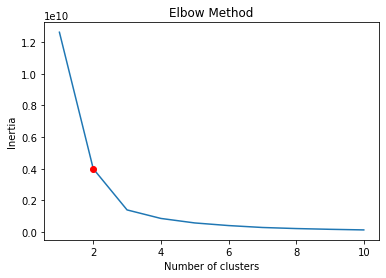

In [37]:
elbow_df = pd.Series(elbow)
ax = elbow_df.plot(title = 'Elbow Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
plt.plot(2,elbow_df[2],'ro')

In [38]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.7230744016715335
For n_clusters = 3 The average silhouette_score is : 0.6508243837427975
For n_clusters = 4 The average silhouette_score is : 0.6026063691519999
For n_clusters = 5 The average silhouette_score is : 0.6111643186910242
For n_clusters = 6 The average silhouette_score is : 0.6091453452465904
For n_clusters = 7 The average silhouette_score is : 0.5798452360299486
For n_clusters = 8 The average silhouette_score is : 0.580083687223732
For n_clusters = 9 The average silhouette_score is : 0.5575869304523694
For n_clusters = 10 The average silhouette_score is : 0.5588597028948651


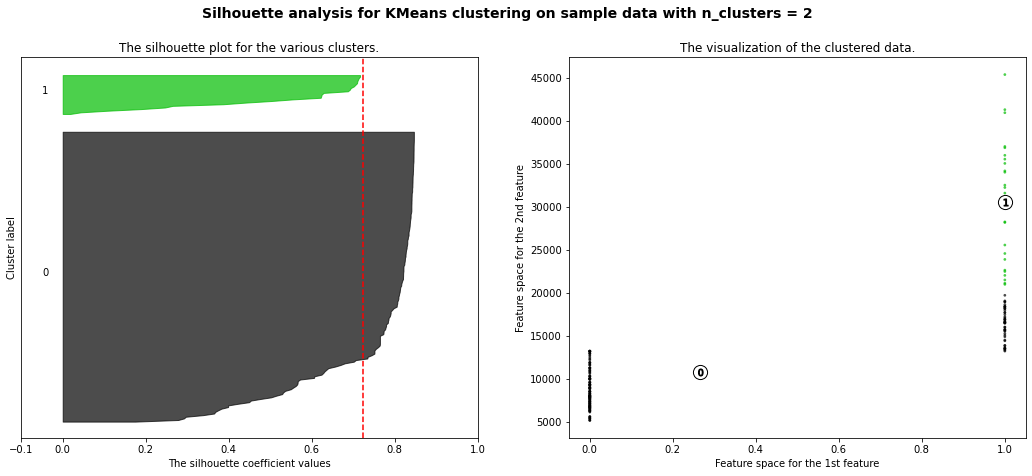

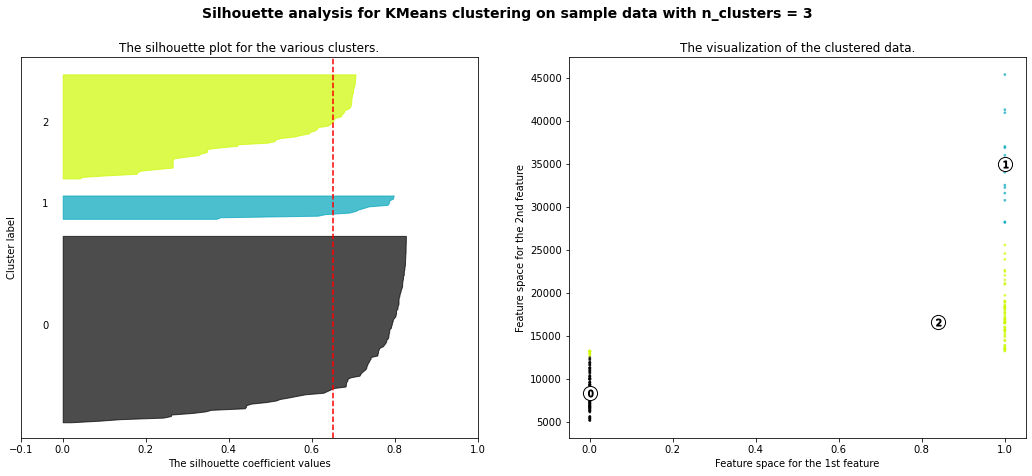

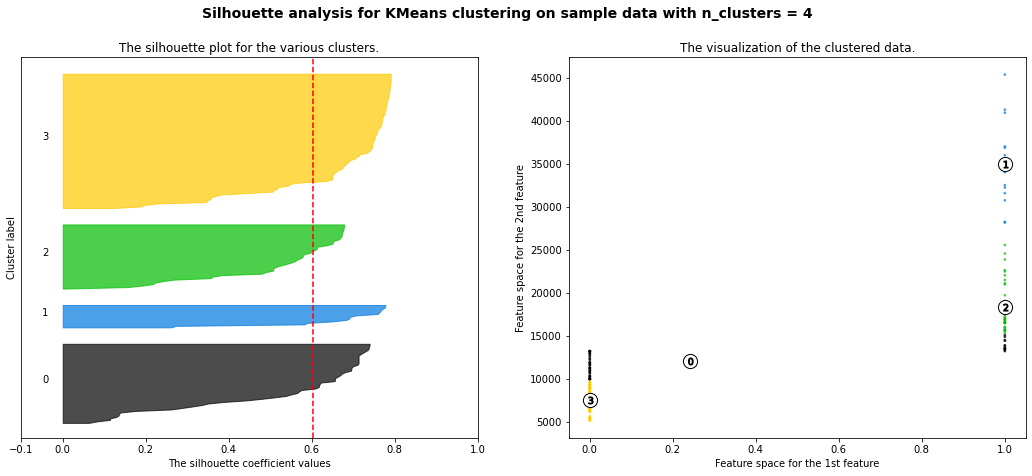

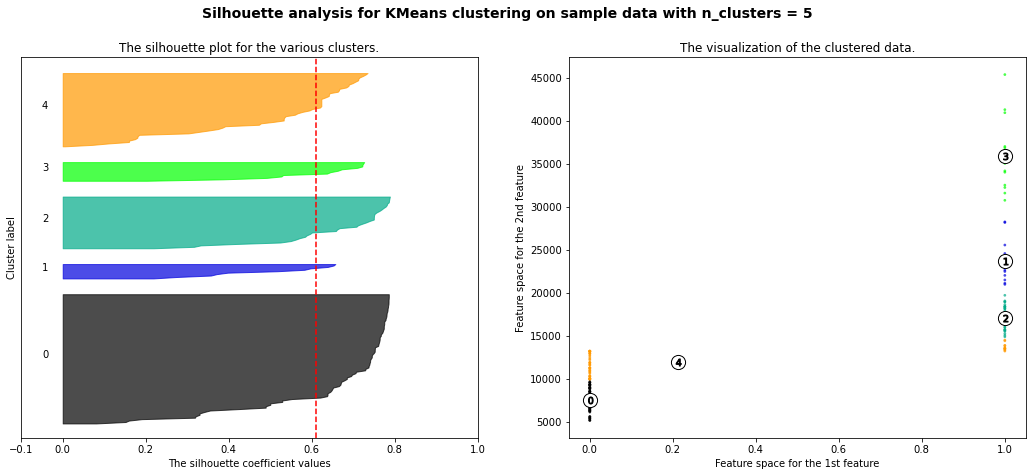

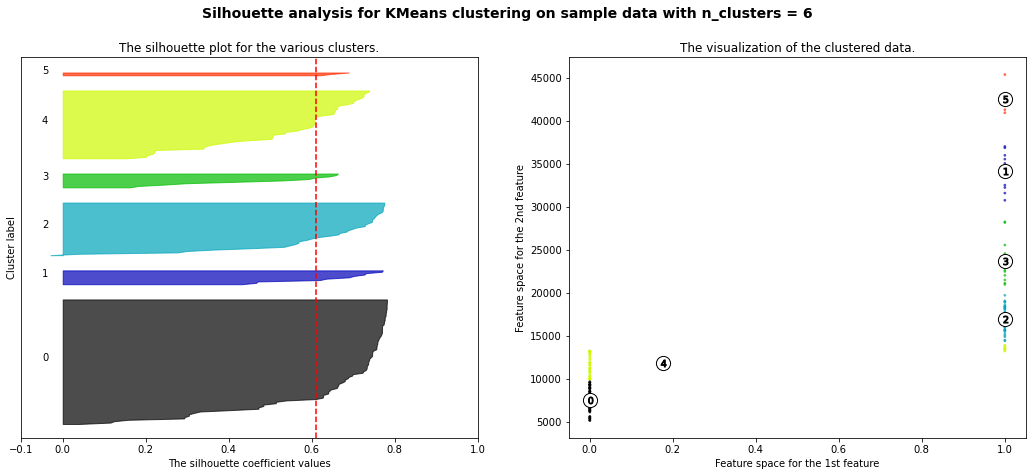

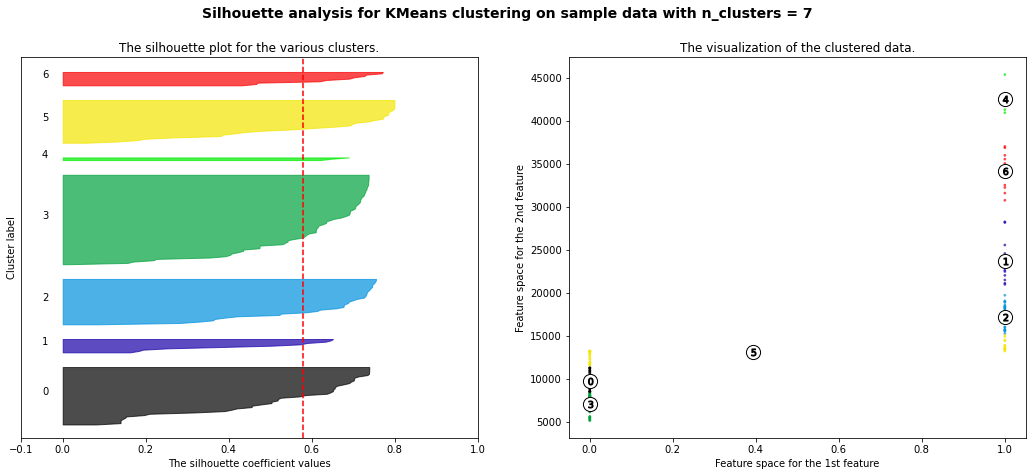

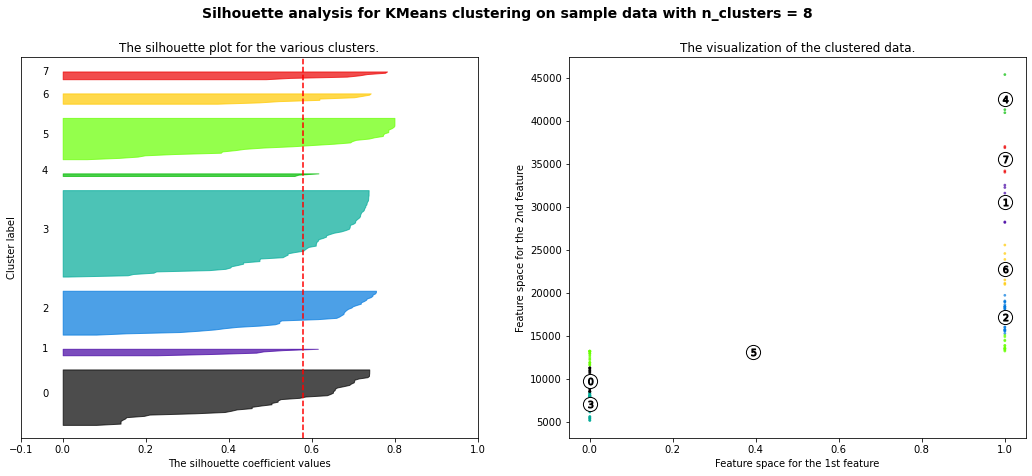

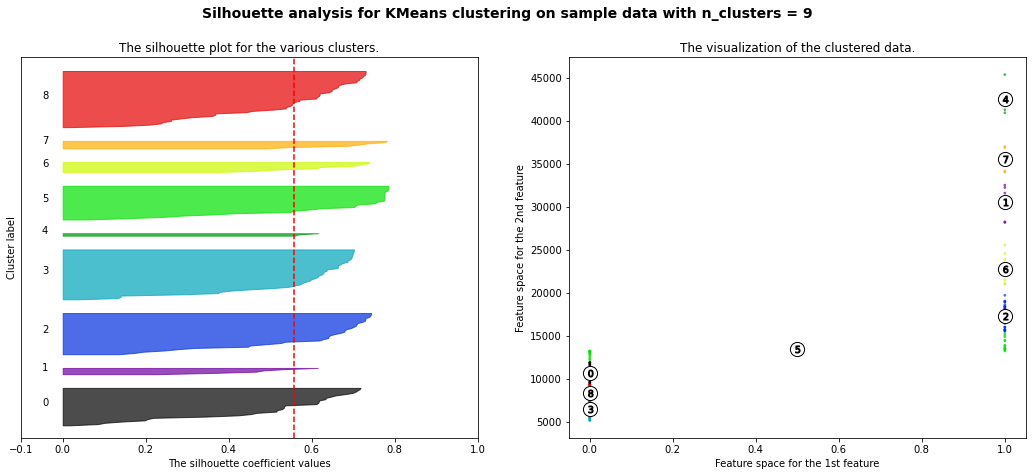

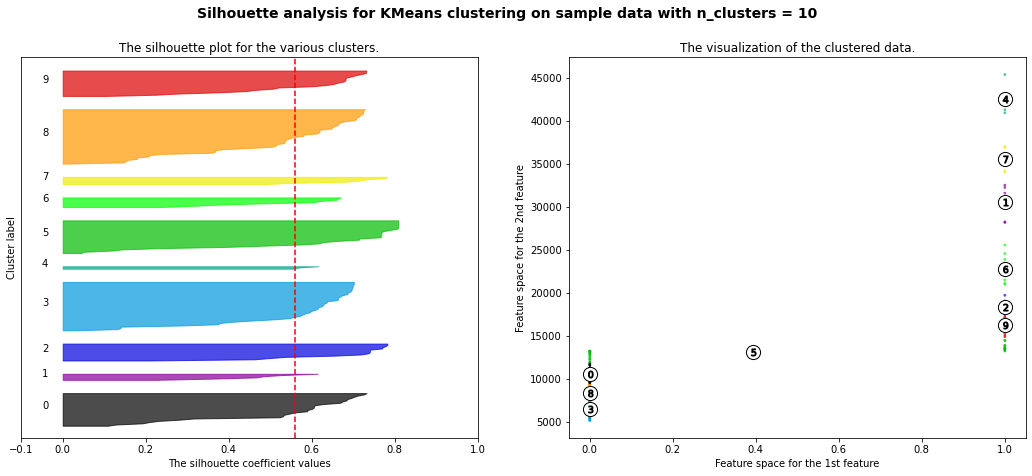

In [39]:
# Silhouette Score Method
seed = 0
dict_silhouette_avg = dict()
range_n_clusters = range(2,11)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(d) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(d)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(d, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    dict_silhouette_avg[n_clusters] = silhouette_avg

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(d, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(d[:, 1], d[:, 0], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 1], centers[:, 0], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[1], c[0], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

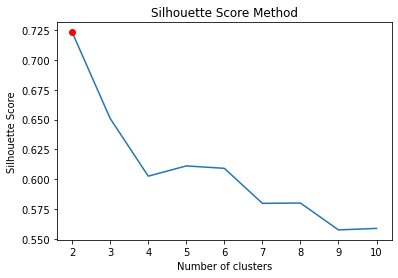

In [40]:
silhouette_df = pd.Series(dict_silhouette_avg)
ax = silhouette_df.plot(title = 'Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Score')
plt.plot(2,silhouette_df[2],'ro')

In elbow method and silhouette score, besk k is 2

#### Problem d

In [41]:
dfnum3['category'] = dfnum3.category.map({1:'high', 0:'low'})

In [42]:
dfnum3['Length'] = np.where(dfnum3['length']<=dfnum3['length'].mean(),
'Short', 'Long')

In [43]:
dfnum3['Width'] = np.where(dfnum3['width']<=dfnum3['width'].mean(),
'Short', 'Long')

In [44]:
dfnum3['Height'] = np.where(dfnum3['height']<=dfnum3['height'].mean(),
'Low', 'High')

In [45]:
dfnum3['Horsepower'] = np.where(dfnum3['horsepower']<=dfnum3['horsepower'].mean(),
'Low', 'High')

In [46]:
dfnum3['City-mpg'] = np.where(dfnum3['city-mpg']<=dfnum3['city-mpg'].mean(),
'Bad', 'Good')

In [47]:
dfnum3['Highway-mpg'] = np.where(dfnum3['highway-mpg']<=dfnum3['highway-mpg'].mean(),
'Bad', 'Good')

In [48]:
dfnum3

,length,width,height,horsepower,city-mpg,highway-mpg,price,category,Length,Width,Height,Horsepower,City-mpg,Highway-mpg
0,168.8,64.1,48.8,111.0,21,27,13495.000000,high,Short,Short,Low,Low,Bad,Bad
1,168.8,64.1,48.8,111.0,21,27,16500.000000,high,Short,Short,Low,Low,Bad,Bad
2,171.2,65.5,52.4,154.0,19,26,13186.849246,low,Short,Short,Low,Low,Bad,Bad
3,176.6,66.2,54.3,102.0,24,30,13186.849246,low,Long,Long,High,Low,Bad,Bad
4,176.6,66.4,54.3,115.0,18,22,17450.000000,high,Long,Long,High,Low,Bad,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,188.8,68.9,55.5,114.0,23,28,16845.000000,high,Long,Long,High,Low,Bad,Bad
201,188.8,68.8,55.5,160.0,19,25,19045.000000,high,Long,Long,High,Low,Bad,Bad
202,188.8,68.9,55.5,134.0,18,23,21485.000000,high,Long,Long,High,Low,Bad,Bad
203,188.8,68.9,55.5,106.0,26,27,22470.000000,high,Long,Long,High,Low,Good,Bad


In [49]:
dfnum4 = dfnum3[['category','Length','Width','Height','Horsepower','City-mpg','Highway-mpg']]

In [50]:
!pip install mlxtend

In [51]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import fpmax
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [52]:
dfnum4['category'] = dfnum4['category'].astype('str')
dfnum4['Length'] = dfnum4['Length'].astype('str')
dfnum4['Width'] = dfnum4['Width'].astype('str')
dfnum4['Height'] = dfnum4['Height'].astype('str')
dfnum4['Horsepower'] = dfnum4['Horsepower'].astype('str')
dfnum4['City-mpg'] = dfnum4['City-mpg'].astype('str')
dfnum4['Highway-mpg'] = dfnum4['Highway-mpg'].astype('str')

<ipython-input-52-a75ea732097b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnum4['category'] = dfnum4['category'].astype('str')
<ipython-input-52-a75ea732097b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnum4['Length'] = dfnum4['Length'].astype('str')
<ipython-input-52-a75ea732097b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [53]:
dfnum7 = dfnum4.values.tolist()

In [54]:
te = TransactionEncoder()
te_ary = te.fit(dfnum7).transform(dfnum7)
te_ary.astype("int")

array([[1, 0, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 0, 1],
       ...,
       [1, 0, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 0, 1, 0],
       [1, 0, 1, ..., 0, 1, 0]])

In [55]:
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

frequent_itemsets

,support,itemsets
0,0.560976,(Bad)
1,0.492683,(Good)
2,0.536585,(High)
3,0.497561,(Long)
4,0.995122,(Low)
...,...,...
72,0.253659,"(Low, Long, High, high)"
73,0.112195,"(Low, Long, High, low)"
74,0.190244,"(Short, Low, High, low)"
75,0.229268,"(High, high, Bad, Low, Long)"


In [56]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold = 0.6)

In [57]:
rules.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction'],
      dtype='object')

In [58]:
rules.sort_values(['support'], axis=0, ascending=False, inplace=True)

In [59]:
rules.nlargest(10,['support'])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
20,(low),(Low),0.643902,0.995122,0.639024,0.992424,0.997289,-0.001737,0.643902
19,(Low),(low),0.995122,0.643902,0.639024,0.642157,0.997289,-0.001737,0.995122
17,(Low),(Short),0.995122,0.619512,0.619512,0.622549,1.004902,0.003022,1.008046
16,(Short),(Low),0.619512,0.995122,0.619512,1.000000,1.004902,0.003022,inf
2,(Bad),(Low),0.560976,0.995122,0.556098,0.991304,0.996164,-0.002142,0.560976
22,(low),(Short),0.643902,0.619512,0.536585,0.833333,1.345144,0.137680,2.282927
95,"(Short, Low)",(low),0.619512,0.643902,0.536585,0.866142,1.345144,0.137680,2.660258
21,(Short),(low),0.619512,0.643902,0.536585,0.866142,1.345144,0.137680,2.660258
98,(Short),"(Low, low)",0.619512,0.639024,0.536585,0.866142,1.355413,0.140702,2.696700
97,"(Low, low)",(Short),0.639024,0.619512,0.536585,0.839695,1.355413,0.140702,2.373519


In [61]:
rules[rules['consequents'] == {'high'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14,(Long),(high),0.497561,0.356098,0.321951,0.647059,1.817083,0.144771,1.824390
89,"(Low, Long)",(high),0.492683,0.356098,0.321951,0.653465,1.835074,0.146508,1.858118
37,"(Bad, Long)",(high),0.409756,0.356098,0.297561,0.726190,2.039302,0.151648,2.351644
129,"(Bad, Low, Long)",(high),0.404878,0.356098,0.297561,0.734940,2.063872,0.153385,2.429268
175,"(Low, Long, High)",(high),0.365854,0.356098,0.253659,0.693333,1.947032,0.123379,2.099682
76,"(Long, High)",(high),0.370732,0.356098,0.253659,0.684211,1.921413,0.121642,2.039024
195,"(Bad, Low, Long, High)",(high),0.287805,0.356098,0.229268,0.796610,2.237056,0.126782,3.165854
117,"(Bad, Low, High)",(high),0.312195,0.356098,0.229268,0.734375,2.062286,0.118096,2.424103
27,"(Bad, High)",(high),0.317073,0.356098,0.229268,0.723077,2.030558,0.116359,2.325203
107,"(Bad, Long, High)",(high),0.292683,0.356098,0.229268,0.783333,2.199772,0.125045,2.971857
